In [18]:
import torch
import torchvision
from torchvision import datasets,transforms,models
import os
import numpy as np
from matplotlib import pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler

In [20]:
dataroot='./hymenoptera_data/'
data_transforms={ 
                 'train': transforms.Compose([transforms.RandomResizedCrop(224), 
                                              transforms.RandomHorizontalFlip(),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                             ]),
                 'val':   transforms.Compose([transforms.Resize(256), 
                                              transforms.CenterCrop(224),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                             ]),
                }

datasets_reqd={x: datasets.ImageFolder(os.path.join(dataroot,x), data_transforms[x]) for x in os.listdir(dataroot)}

dataloader={ x: torch.utils.data.DataLoader(datasets_reqd[x], batch_size=4 , num_workers=4 , shuffle=True) for x in os.listdir(dataroot)}


datalength= { x : len(datasets_reqd[x]) for x in os.listdir(dataroot)}


class_names=datasets_reqd['train'].classes

device=torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
class_names
            

['ants', 'bees']

In [16]:
class_names

def imgshow(img):
    im=img.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    im= std*im + mean
    plt.imshow(im)
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


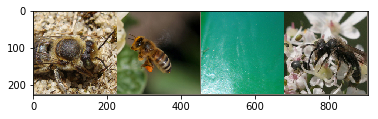

In [17]:
images,labels= iter(dataloader['train']).next()
images=torchvision.utils.make_grid(images)
imgshow(images)

In [38]:
def train_model(model, criterion, optimizer, scheduler , num_epochs=25):
    since=time.time()
    best_model_wts=copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase=='train':
                scheduler.step()
                model.train()
            else:
                model.eval()
            running_loss=0
            running_corrects=0
            for images , labels in dataloader[phase]:
                images=images.to(device)
                labels=labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase=='train'):
                    
                    outputs=model(images)
                    _,predictions=torch.max(outputs,1)
                    loss=criterion(outputs,labels)
                    if phase=='train':
                        loss.backward()
                        optimizer.step()
                running_loss+=loss.item()*images.size(0)
                running_corrects+=torch.sum(predictions == labels.data)
            epoch_loss=running_loss/datalength[phase]
            epoch_acc=running_corrects.double()/datalength[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            
            if phase=='val' and epoch_acc>best_acc:
                best_acc=epoch_acc
                best_model_wts=copy.deepcopy(model.state_dict())
    model.load_state_dict(best_model_wts)    
    return model
            

In [30]:
import torch.nn as nn
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [39]:
import time
import copy
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)


train Loss: 0.6893 Acc: 0.7500
val Loss: 0.2300 Acc: 0.9477
train Loss: 0.3768 Acc: 0.8484
val Loss: 0.1834 Acc: 0.9477
train Loss: 0.4459 Acc: 0.7951
val Loss: 0.2461 Acc: 0.9216
train Loss: 0.4256 Acc: 0.8320
val Loss: 0.1800 Acc: 0.9412
train Loss: 0.6025 Acc: 0.7787
val Loss: 0.2982 Acc: 0.9216
train Loss: 0.5298 Acc: 0.7664
val Loss: 0.1888 Acc: 0.9542
train Loss: 0.4242 Acc: 0.8361
val Loss: 0.2030 Acc: 0.9412
train Loss: 0.4742 Acc: 0.8197
val Loss: 0.2029 Acc: 0.9542
train Loss: 0.5731 Acc: 0.7910
val Loss: 0.2354 Acc: 0.9542
train Loss: 0.8771 Acc: 0.7172
val Loss: 0.2096 Acc: 0.9477
train Loss: 0.6483 Acc: 0.7664
val Loss: 0.3695 Acc: 0.8824
train Loss: 0.3767 Acc: 0.8279
val Loss: 0.2439 Acc: 0.9542
train Loss: 0.2278 Acc: 0.9057
val Loss: 0.2488 Acc: 0.9542
train Loss: 0.5329 Acc: 0.7869
val Loss: 0.1960 Acc: 0.9477
train Loss: 0.4279 Acc: 0.8156
val Loss: 0.2272 Acc: 0.9608
train Loss: 0.4394 Acc: 0.8320
val Loss: 0.1895 Acc: 0.9412
train Loss: 0.3412 Acc: 0.8689
val Loss:

KeyboardInterrupt: 

In [64]:
import torch
from torchvision import datasets,models
import numpy as np
import torch.nn as nn
import torch.utils
import os
import torchvision
import torch.optim as optim
import copy

# Datalaoding, dataset preparation , transformations

In [67]:
T          = {'train' : transforms.Compose([ transforms.RandomResizedCrop(224),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
                                            ]),
             
            'val':  transforms.Compose([ transforms.RandomResizedCrop(224),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
                                            ]) 

             }
root= './hymenoptera_data'
dataset_reqd = { x : datasets.ImageFolder(os.path.join(root,x), T[x]) for x in ['train','val']}
dataloader_reqd= { x : torch.utils.data.DataLoader(dataset_reqd[x], batch_size=4 , num_workers=4, shuffle=True) for x in ['train', 'val']}
            
datalength= { x : len(dataset_reqd[x]) for x in ['train' , 'val']}

image,labels= iter(dataloader_reqd['train']).next()
labels          

tensor([0, 0, 1, 0])

# ImageDisplay

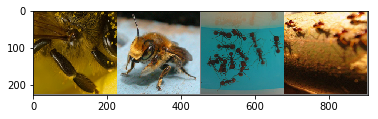

In [68]:
from matplotlib import pyplot as plt
def imageshow(im):
    im_np= im.numpy()
    im_np= np.transpose(im_np, (1,2,0))
    im_np=im_np*0.5 + 0.5 
    plt.imshow(im_np)
images,labels = iter(dataloader_reqd['train']).next()
images=torchvision.utils.make_grid(images)
imageshow(images)
#images

# Define Network

In [47]:
#Define network if exists

In [62]:
def training_model(model , scheduler , optim, criterion):
    best_model=copy.deepcopy(model.state_dict())
    best_acc=0
    for epoch in range(num_epochs):
        for phase in ['train','val']:
            if phase=='train':
                scheduler.step()
                model.train()
            if phase == 'val':
                model.eval
            running_loss=0
            running_correctness=0
            
            for images,labels in dataloader_reqd[phase]:
                images=images.to(device)
                labels = labels.to(device)
                optim.zero_grad()
            
                with torch.set_grad_enabled(phase=='train'):
                    output = model(images)
                    loss = criterion(output,labels)
                    _,predictions= torch.max(output,1)
                       
                    if phase == 'train':
                        loss.backward()
                        optim.step()
                running_loss+=loss*images.shape(0)
                running_correctness += torch.sum(predictions==labels)
            epoch_loss= running_loss/datalength[phase]
            epoch_correctness= running_correctness.double()/datalength[phase]
            print("{} , {} " .format(epoch_loss,epoch_correctness))
            
            if phase=='val' and epoch_correctness > best_acc:
                best_acc=epoch_correctness
                best_model=copy.deepcopy(model.state_dict())
                
    model.load_state_dict(best_model)
    return model
            



# Optimizer

In [66]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

512